<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/0_ANN_MNist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow 2.0
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 45kB/s 
     |████████████████████████████████| 501kB 49.0MB/s 
     |████████████████████████████████| 3.1MB 59.6MB/s 


In [3]:
# Import Libraries

import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
# Load Mnist Data

mnist = tf.keras.datasets.mnist

In [6]:
data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
type(data)

tuple

In [9]:
data[:4]

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
# As it is of Type Tuple, we spectfy it as a Tuple

(X_train, y_train),(X_test, y_test) = data

In [11]:
# Normalize it by dividing with 255

X_train, X_test = X_train/255, X_test/255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
# Building the Model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Model Compilation

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Training the Model

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2952 - accuracy: 0.9137 - val_loss: 0.1354 - val_accuracy: 0.9601
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1418 - accuracy: 0.9575 - val_loss: 0.0928 - val_accuracy: 0.9723
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1067 - accuracy: 0.9668 - val_loss: 0.0866 - val_accuracy: 0.9722
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0865 - accuracy: 0.9736 - val_loss: 0.0763 - val_accuracy: 0.9778
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0744 - accuracy: 0.9767 - val_loss: 0.0707 - val_accuracy: 0.9773
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0654 - accuracy: 0.9797 - va

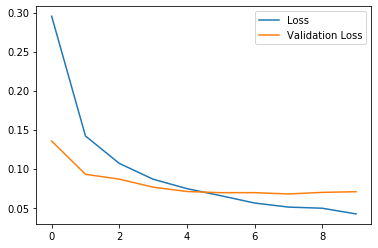

In [15]:
# Plotting the Loss for each Iteration

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend();

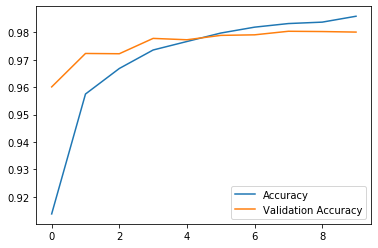

In [17]:
# Plotting the Loss for each Iteration

plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend();
plt.show();

In [18]:
# Evaluating the Model

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.0705 - accuracy: 0.9801


[0.07048264731729868, 0.9801]

In [0]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [0]:
# Defining for Multiclass Confusion Matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
        print('Normalised Confusion Matrix')
    else:
        print('Confusion Matrix without Normalisation')
    print(cm)

    # Plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    # Formatting text
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

Confusion Matrix without Normalisation
[[ 972    1    2    0    0    1    2    1    1    0]
 [   0 1129    4    0    0    1    1    0    0    0]
 [   2    1 1018    1    2    0    2    3    3    0]
 [   0    0    4  986    1   14    0    4    1    0]
 [   1    0    3    0  964    0    5    3    1    5]
 [   3    0    0    4    2  875    2    0    5    1]
 [   5    3    1    1    4    6  937    0    1    0]
 [   2    3   13    3    0    0    0 1002    1    4]
 [   3    0    6   13    1    4    1    3  940    3]
 [   2    2    1    8    9    6    0    2    1  978]]


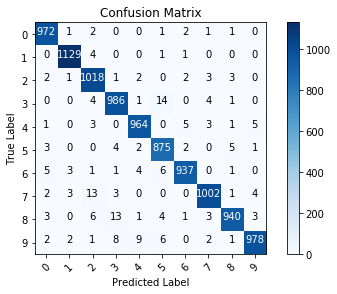

In [22]:
# Confusion Matrix Plot

y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot via Defined COnfusion Matrix

plot_confusion_matrix(cm, list(range(10)))

In [0]:
# Show Misclassified Example

misclass = np.where(y_pred != y_test)

In [24]:
misclass

(array([ 115,  233,  241,  247,  274,  320,  321,  340,  381,  445,  447,
         449,  479,  495,  582,  659,  684,  691,  720,  740,  786,  810,
         951,  956,  965, 1014, 1039, 1044, 1112, 1181, 1182, 1226, 1232,
        1242, 1247, 1319, 1328, 1464, 1494, 1500, 1522, 1530, 1549, 1553,
        1609, 1678, 1681, 1709, 1717, 1751, 1754, 1828, 1855, 1878, 1901,
        1903, 1941, 2004, 2016, 2044, 2053, 2073, 2093, 2098, 2109, 2118,
        2135, 2162, 2185, 2272, 2308, 2369, 2387, 2414, 2422, 2488, 2597,
        2598, 2607, 2648, 2654, 2877, 2915, 2927, 2939, 2952, 2953, 2995,
        3073, 3115, 3117, 3225, 3289, 3422, 3475, 3503, 3520, 3549, 3558,
        3567, 3597, 3626, 3674, 3681, 3749, 3751, 3767, 3776, 3780, 3808,
        3817, 3850, 3853, 3869, 3893, 3902, 3906, 3941, 3943, 3985, 4027,
        4065, 4078, 4140, 4159, 4163, 4199, 4224, 4248, 4289, 4294, 4360,
        4425, 4433, 4497, 4536, 4639, 4751, 4807, 4823, 4880, 4978, 5046,
        5140, 5331, 5495, 5642, 5676, 

In [27]:
# To get only Index of Misclassified Example
misclass[0]

array([ 115,  233,  241,  247,  274,  320,  321,  340,  381,  445,  447,
        449,  479,  495,  582,  659,  684,  691,  720,  740,  786,  810,
        951,  956,  965, 1014, 1039, 1044, 1112, 1181, 1182, 1226, 1232,
       1242, 1247, 1319, 1328, 1464, 1494, 1500, 1522, 1530, 1549, 1553,
       1609, 1678, 1681, 1709, 1717, 1751, 1754, 1828, 1855, 1878, 1901,
       1903, 1941, 2004, 2016, 2044, 2053, 2073, 2093, 2098, 2109, 2118,
       2135, 2162, 2185, 2272, 2308, 2369, 2387, 2414, 2422, 2488, 2597,
       2598, 2607, 2648, 2654, 2877, 2915, 2927, 2939, 2952, 2953, 2995,
       3073, 3115, 3117, 3225, 3289, 3422, 3475, 3503, 3520, 3549, 3558,
       3567, 3597, 3626, 3674, 3681, 3749, 3751, 3767, 3776, 3780, 3808,
       3817, 3850, 3853, 3869, 3893, 3902, 3906, 3941, 3943, 3985, 4027,
       4065, 4078, 4140, 4159, 4163, 4199, 4224, 4248, 4289, 4294, 4360,
       4425, 4433, 4497, 4536, 4639, 4751, 4807, 4823, 4880, 4978, 5046,
       5140, 5331, 5495, 5642, 5676, 5719, 5734, 57

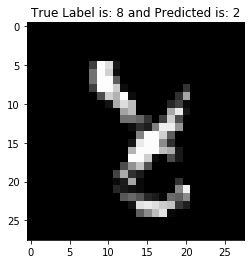

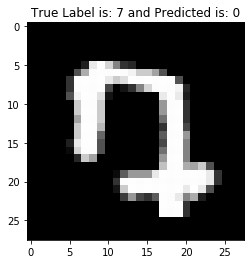

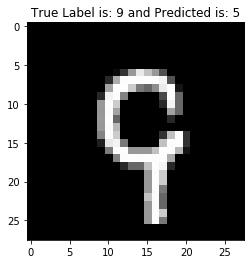

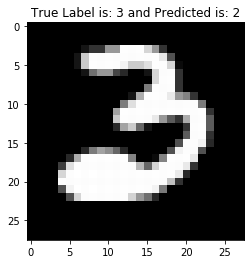

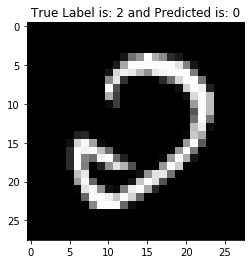

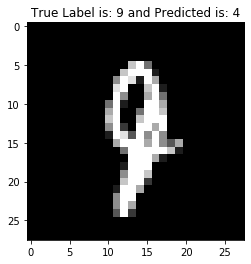

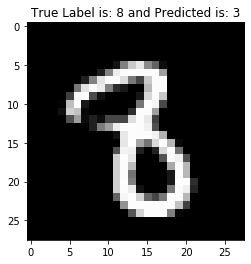

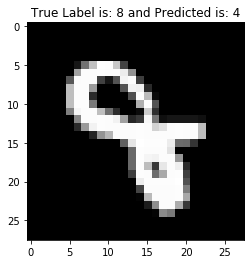

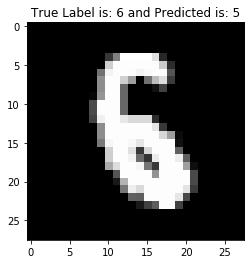

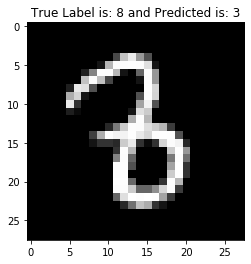

In [37]:
# While Loop to Plot all Misclassified Points
wh = 10
while wh != 0:
  i = np.random.choice(misclass[0])
  plt.imshow(X_test[i], cmap='gray')
  plt.title("True Label is: %s and Predicted is: %s" % (y_test[i], y_pred[i]))
  plt.show()
  wh -= 1
  print('\n')